In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Age_wise_Population_as_per_2011_Census_and_Projected_population_of_2022.csv'
data = pd.read_csv(file_path)

print("Dataset Overview:")
print(data.head())

Dataset Overview:
     District  0-14_2011_Male  0-14_2011_Female  0-14_2011_Total  \
0    Belagavi          709480            656901          1366381   
1    Bagalkot          302683            284905           587588   
2  Vijayapura          358717            333076           691793   
3    Kalburgi          423079            396858           819937   
4       Bidar          268922            255088           524010   

   0-14_2022_Male  0-14_2022_Female  0-14_2022_Total  
0          826983            759803          1586786  
1          356880            328974           685854  
2          450430            403823           854253  
3          507916            480321           988237  
4          309589            293604           603193  


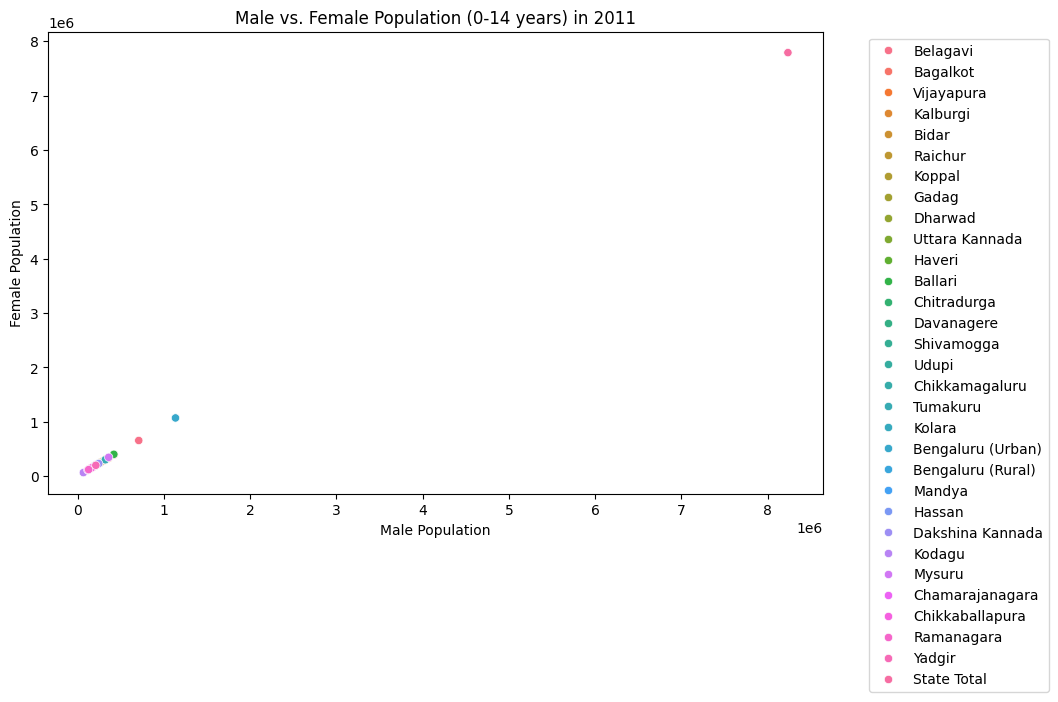

In [2]:
# 1. Male vs. Female population (2011)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['0-14_2011_Male'], y=data['0-14_2011_Female'], hue=data['District'])
plt.title('Male vs. Female Population (0-14 years) in 2011')
plt.xlabel('Male Population')
plt.ylabel('Female Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Observations:

#### Strong Positive Correlation:
There is a clear positive correlation between male and female populations in 2011. Districts with higher male populations tend to have proportionally higher female populations.

#### Clustered Distribution: 
Most districts have a male and female population below 2 million, with one outlier (likely the "State Total") having much higher values.

#### Outlier Identification:
The outlier (top right) represents the aggregated data for the entire state, significantly skewing the scale of the plot.

#### No Significant Gender Disparity:
Male and female population numbers are relatively balanced, as data points lie close to a straight diagonal.

## Implications:

#### Proportional Planning: 
Since the male and female populations are strongly correlated, population-based resource allocation (e.g., education, healthcare, and welfare programs) can be proportional for both genders without significant adjustments for gender-specific disparities.

#### Focus on Clusters: 
Policy interventions can primarily target the districts clustered in the lower population range, as most fall within that range.

#### Outlier Management:
The inclusion of state totals as an outlier in the analysis might obscure finer district-level trends. It would be beneficial to analyze district-level data separately from the aggregated state total.

#### Future Trends: 
If similar trends persist in 2022, projections and planning can assume consistent male-to-female ratios across districts for upcoming years.

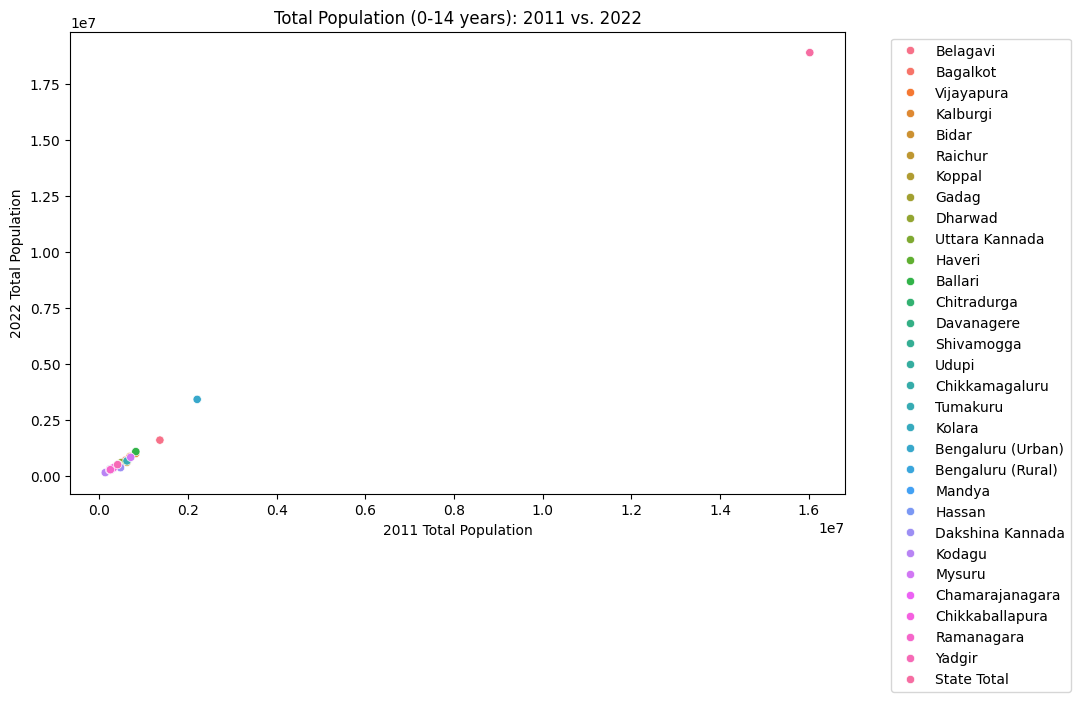

In [3]:
# 2. Total population in 2011 vs. 2022
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['0-14_2011_Total'], y=data['0-14_2022_Total'], hue=data['District'])
plt.title('Total Population (0-14 years): 2011 vs. 2022')
plt.xlabel('2011 Total Population')
plt.ylabel('2022 Total Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



### Observations:
1. The state total population for 0-14 years has significantly increased between 2011 and 2022, as seen from the isolated pink point on the scatter plot.
2. Most districts exhibit a proportional increase in population between 2011 and 2022, indicated by the linear clustering of points.
3. A few districts, such as Bengaluru Urban, show disproportionately high growth, likely due to urbanization and migration trends.
4. The majority of districts are clustered at lower population ranges, indicating lower birth rates or smaller district sizes.

### Implications:
1. High-growth regions, especially urban areas like Bengaluru Urban, require enhanced infrastructure and resources to accommodate the rising youth population.
2. Consistent population trends across most districts suggest stable growth, requiring balanced resource distribution across Karnataka.
3. Districts with low population growth may face challenges in retaining youth and ensuring economic viability, calling for targeted development programs.
4. Statewide planning should account for urban migration trends and invest in long-term infrastructure in both urban and rural areas.


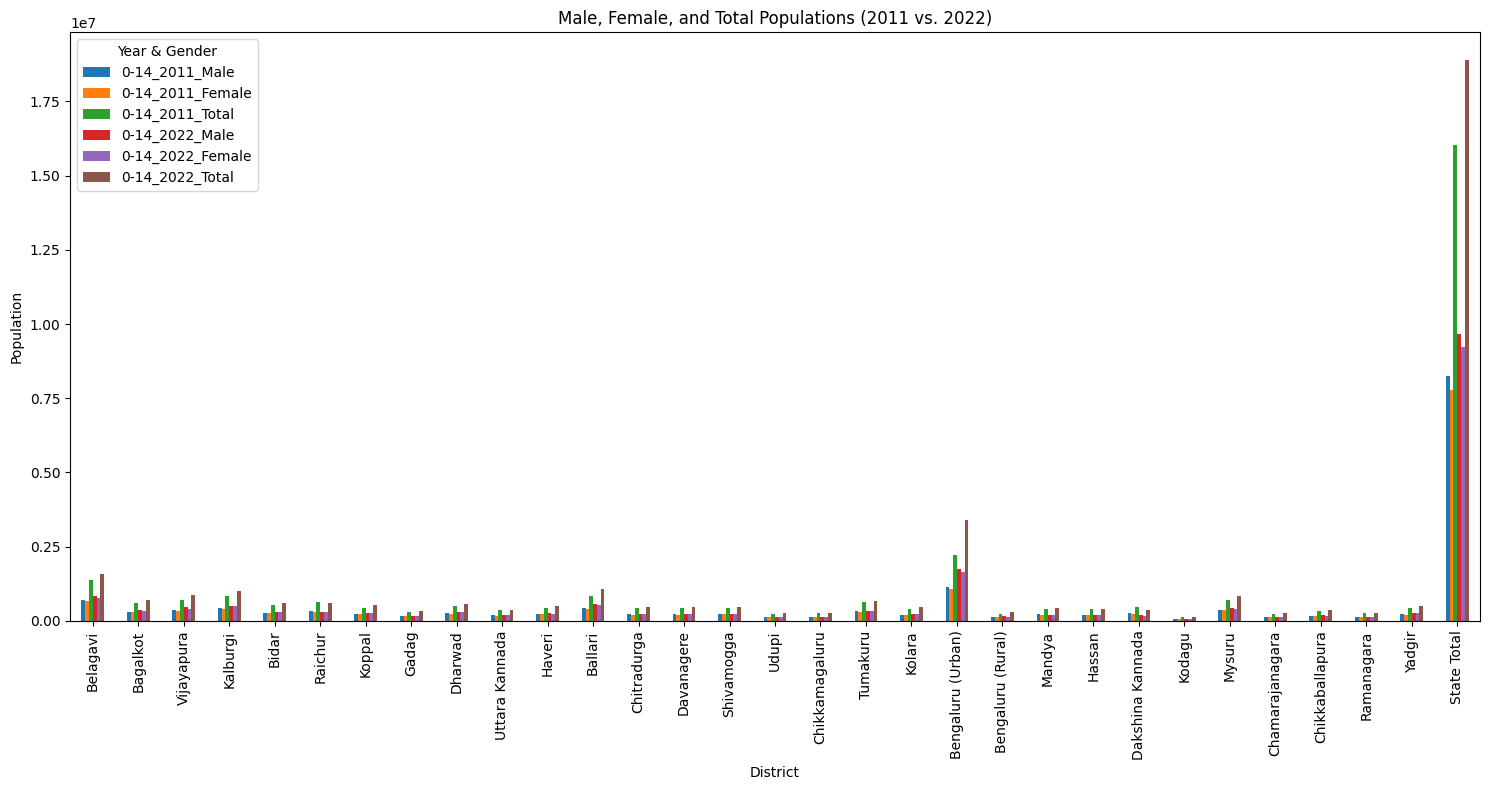

In [4]:

#Comparing male, female, and total populations across years using bar plots
data.set_index('District', inplace=True)
data[['0-14_2011_Male', '0-14_2011_Female', '0-14_2011_Total', 
      '0-14_2022_Male', '0-14_2022_Female', '0-14_2022_Total']].plot(kind='bar', figsize=(15, 8))
plt.title('Male, Female, and Total Populations (2011 vs. 2022)')
plt.ylabel('Population')
plt.xlabel('District')
plt.legend(title='Year & Gender')
plt.tight_layout()
plt.show()



### Observations:
1. Male and female populations for the 0-14 age group are nearly equal across all districts in both 2011 and 2022, indicating no significant gender disparity.
2. The total population for the 0-14 age group has increased marginally in all districts between 2011 and 2022.
3. Bengaluru Urban exhibits the largest population for both years, contributing significantly to the state total.
4. Smaller districts like Kodagu and Chamarajanagar have consistently low child population sizes, with little change over the years.
5. The state total population shows a clear cumulative increase, reflecting the population growth trends across all districts.

### Implications:
1. The gender balance in the child population across all districts is a positive indicator for societal progress.
2. Urban districts like Bengaluru Urban require substantial investments in education and healthcare to accommodate the growing population of children.
3. Smaller districts may need targeted incentives to attract families and foster population growth, ensuring equitable development.
4. State-level planning should prioritize child-centric policies, considering the steady increase in the 0-14 age group population across Karnataka.
5. Strategic distribution of resources is necessary to address the needs of both high-population urban areas and low-population rural districts.


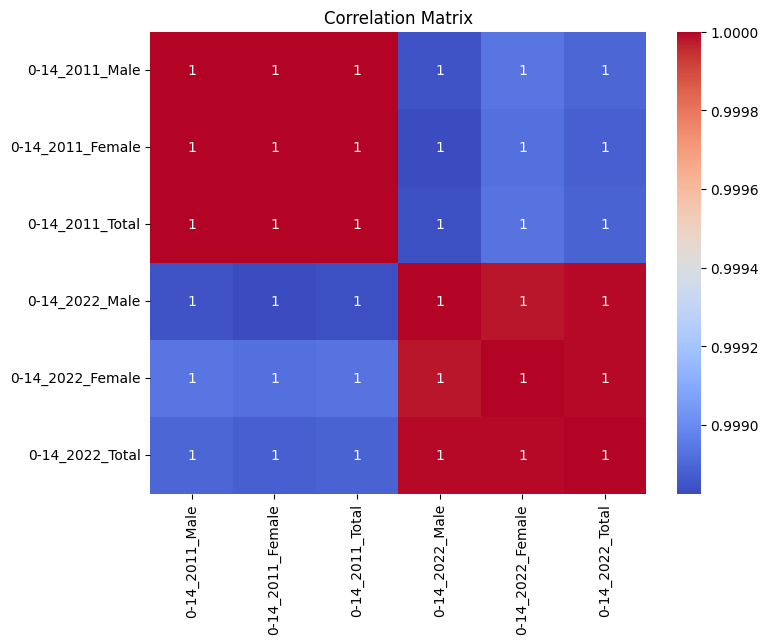

In [5]:
#Correlation heatmap
corr_matrix = data[['0-14_2011_Male', '0-14_2011_Female', '0-14_2011_Total', 
                    '0-14_2022_Male', '0-14_2022_Female', '0-14_2022_Total']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Observations:
1. All variables show very high correlations, with values close to 1, indicating a strong linear relationship across the data.
2. Within the same year, male, female, and total populations are perfectly correlated (correlation value = 1).
3. The populations between 2011 and 2022 also exhibit strong correlations, reflecting consistent trends over time.
4. The heatmap's red areas highlight perfect correlations, while the blue regions represent slightly lower correlations (but still close to 1).

### Implications:
1. The high correlations suggest stability in population trends for the 0-14 age group across the years.
2. Historical population data can be used to predict future trends with high reliability, aiding in strategic planning.
3. The consistency in trends provides a strong foundation for evidence-based policymaking in areas like education, healthcare, and infrastructure development.
4. Perfect intra-year correlations validate the accuracy of the dataset and its suitability for further analysis.


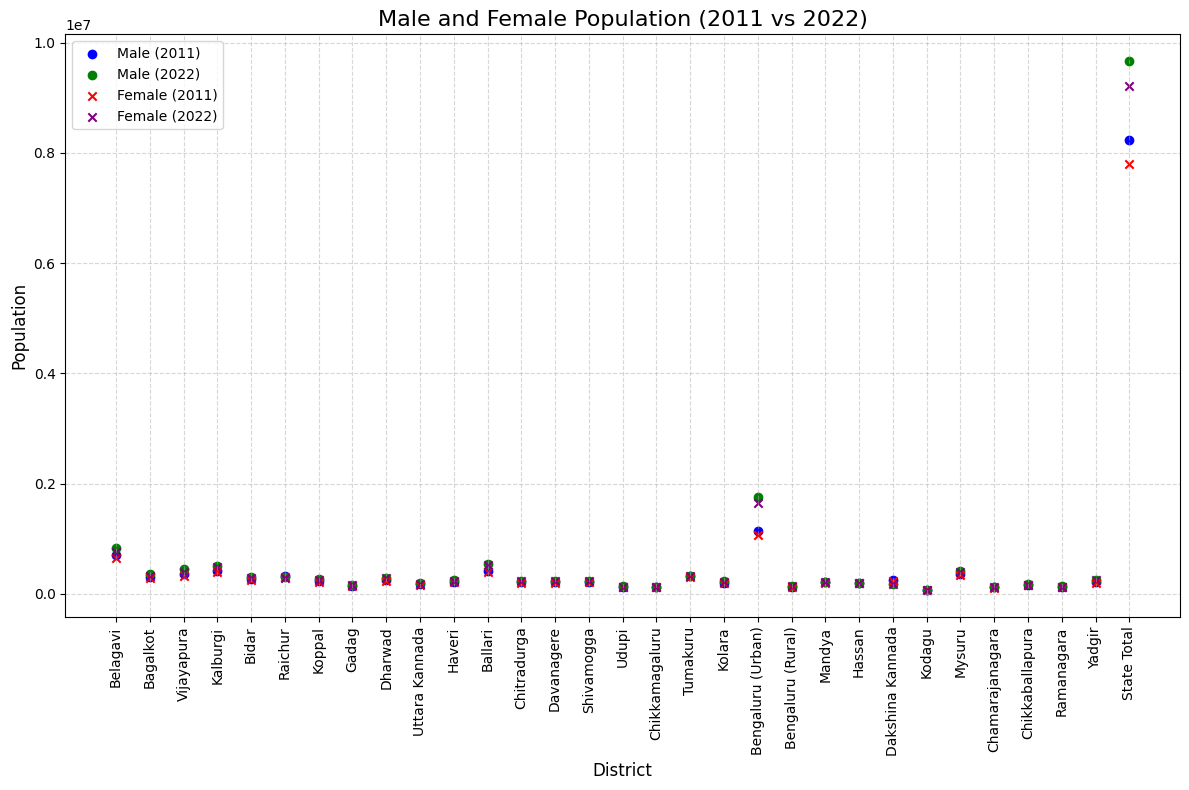

In [6]:
if 'District' not in data.columns:
    data.reset_index(inplace=True)

# Combined Scatter Plot for Male and Female Populations (2011 and 2022)
plt.figure(figsize=(12, 8))

# Plot Male Population for 2011 and 2022 as dots
plt.scatter(data['District'], data['0-14_2011_Male'], label='Male (2011)', color='blue', marker='o')
plt.scatter(data['District'], data['0-14_2022_Male'], label='Male (2022)', color='green', marker='o')

# Plot Female Population for 2011 and 2022 as crosses
plt.scatter(data['District'], data['0-14_2011_Female'], label='Female (2011)', color='red', marker='x')
plt.scatter(data['District'], data['0-14_2022_Female'], label='Female (2022)', color='purple', marker='x')

# Title and labels
plt.title('Male and Female Population (2011 vs 2022)', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Population', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show grid for better interpretation
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


### Observations:
##### Population Trends Across Years:
- The male and female populations for each district in 2011 and 2022 show consistent growth trends, as male and female markers for 2022 are slightly above those for 2011.
- The differences between 2011 and 2022 populations are more pronounced in highly populated districts like Bengaluru (Urban).
##### State Total as Outlier:
- The "State Total" data point is significantly larger than individual district data, making it an outlier. This creates a scale issue, with other districts appearing clustered near the origin.
##### Gender Balance:
- The male and female populations are closely aligned for each district in both years, indicating no significant gender imbalance across districts.
##### Population Concentration:
- Most districts show relatively small population values compared to urban areas like Bengaluru (Urban) and the aggregated "State Total."

### Implications:
##### Policy and Resource Allocation:
- Districts like Bengaluru (Urban) with higher populations require focused resource allocation for infrastructure, education, healthcare, and employment.
- Less populated districts may need tailored policies to promote balanced development.
##### Urban vs Rural Development:
- The significant population disparity between urban (e.g., Bengaluru) and rural districts highlights the need for migration management and rural development policies.
##### Sustainability Planning:
- Consistent growth trends from 2011 to 2022 indicate the importance of sustainable planning for future population increases, especially in high-growth areas.
##### Gender Inclusivity:
- With no visible gender imbalance, future policies can continue to focus on providing equitable opportunities for both genders.
